# 02. Decision Trees and Random Forest | أشجار القرار والغابة العشوائية

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 04, Unit 3** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 02. Decision Trees and Random Forest | أشجار القرار والغابة العشوائية

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 3, Example 1: Logistic Regression** - Understanding classification basics
- ✅ **Understanding of overfitting**: What happens when models are too complex
- ✅ **Basic decision-making concepts**: If-then rules

**If you haven't completed these**, you might struggle with:
- Understanding how decision trees make predictions
- Knowing when to use decision trees vs logistic regression
- Understanding how Random Forest improves on single trees

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 2** - it introduces tree-based classification models!

**Why this example SECOND in Unit 3?**
- **Before** you can use tree-based models, you need to understand basic classification
- **Before** you can use Random Forest, you need to understand single decision trees
- **Before** you can handle complex data, you need to see how trees handle non-linear patterns

**Builds on**: 
- 📓 Unit 3, Example 1: Logistic Regression (we know classification basics)
- 📓 Unit 1, Example 5: Polynomial Regression (we saw overfitting!)

**Leads to**: 
- 📓 Example 3: SVM (another advanced classifier)
- 📓 Unit 5, Example 2: Boosting (uses trees as base learners)
- 📓 All tree-based models (XGBoost, LightGBM, etc.)

**Why this order?**
1. Decision trees are **interpretable** (easy to understand)
2. Decision trees handle **non-linear patterns** (better than logistic regression for complex data)
3. Random Forest shows **ensemble methods** (combining multiple models improves performance)

---

## The Story: Making Decisions Like a Tree | القصة: اتخاذ القرارات مثل الشجرة

Imagine you're deciding what to wear. **Before** decision trees, you use a simple rule (like logistic regression). **After** decision trees, you use a series of questions: "Is it raining? → Yes → Wear raincoat. No → Is it cold? → Yes → Wear jacket..." - much more flexible!

Same with machine learning: **Before** decision trees, we use simple linear boundaries. **After** decision trees, we use complex if-then rules that can handle any pattern!

---

## What is a Decision Tree? | ما هي شجرة القرار؟

**A Decision Tree is a classification algorithm that makes predictions by asking a series of yes/no questions about the data features.**

### How Decision Trees Work | كيف تعمل أشجار القرار

1. **Start at the Root**: Begin with all data at the top (root node)
2. **Ask Questions**: At each step, ask: "Is feature X > value Y?"
3. **Split Data**: Based on the answer, split data into two groups (left/right)
4. **Repeat**: Continue asking questions and splitting until you reach a decision
5. **Make Prediction**: When you reach a leaf node (no more splits), predict the class

### Simple Example | مثال بسيط

**Predicting if someone will buy a product:**
```
Start: All customers
  ↓
Question 1: Is age > 30?
  ├─ YES → Question 2: Is income > $50k?
  │         ├─ YES → Predict: Will buy ✅
  │         └─ NO → Predict: Won't buy ❌
  └─ NO → Predict: Won't buy ❌
```

### Key Components | المكونات الرئيسية
- **Root Node**: Top of the tree (starts with all data)
- **Internal Nodes**: Decision points (ask questions)
- **Branches**: Paths based on answers (yes/no)
- **Leaf Nodes**: Final predictions (no more questions)

### Why Decision Trees Matter | لماذا تهم أشجار القرار؟

Decision trees are powerful and interpretable:
- **Interpretable**: You can see exactly how decisions are made (if-then rules)
- **Non-Linear**: Can handle complex patterns that linear models can't
- **Feature Importance**: Automatically shows which features matter most
- **No Scaling Needed**: Works with raw data (unlike logistic regression)
- **Random Forest**: Combines many trees for better performance

---

## What is Random Forest? | ما هي الغابة العشوائية؟

**Random Forest is an ensemble method that combines many decision trees to make better predictions than a single tree.**

### How Random Forest Works | كيف تعمل الغابة العشوائية

1. **Build Many Trees**: Create 100+ decision trees (each trained on different data)
2. **Bootstrap Sampling**: Each tree sees a random sample of training data (with replacement)
3. **Random Features**: Each tree uses a random subset of features at each split
4. **Vote for Prediction**: All trees vote, final prediction = majority vote

### Simple Example | مثال بسيط

**Predicting if someone will buy a product:**
```
Tree 1 says: Will buy ✅
Tree 2 says: Will buy ✅
Tree 3 says: Won't buy ❌
Tree 4 says: Will buy ✅
Tree 5 says: Will buy ✅
...
Tree 100 says: Will buy ✅

Final Prediction: Will buy ✅ (majority vote: 97 trees say YES)
```

### Why Random Forest is Better | لماذا الغابة العشوائية أفضل

- **Reduces Overfitting**: Single tree can overfit, but averaging many trees reduces this
- **More Robust**: Less sensitive to data changes (one tree can't ruin everything)
- **Better Performance**: Usually performs better than a single tree
- **Feature Importance**: Shows which features matter across all trees

---

## 🌍 Real-World Applications | التطبيقات في الحياة الواقعية

**Decision Trees and Random Forest are widely used for interpretable, powerful classification!** Key applications:

### 🏥 Healthcare & Medical Sector | القطاع الصحي والطبي
- **Medical Diagnosis**: Interpretable rules for disease diagnosis (if age > 50 AND blood_pressure > 140 → high risk)
- **Drug Discovery**: Random Forest identifies important molecular features for drug effectiveness
- **Patient Risk Stratification**: Trees create clear rules for patient risk levels

### 💰 Finance & Banking Sector | القطاع المالي والمصرفي
- **Credit Scoring**: Interpretable rules for loan approval (if income > $50k AND credit_score > 700 → approve)
- **Fraud Detection**: Random Forest detects fraudulent transactions with feature importance
- **Regulatory Compliance**: Interpretable models required by regulators (trees are perfect!)

### 🏛️ Government & Public Safety Sector | القطاع الحكومي والسلامة العامة
- **Security Decision Rules**: Create interpretable security rules (if age < 25 AND behavior = suspicious → high risk) → explainable security decisions
- **Threat Assessment**: Interpretable rules for threat levels → security personnel can understand decisions
- **Traffic Management**: Trees create clear traffic violation rules → automated traffic enforcement

### 💡 Why Decision Trees are Popular:
- **Interpretable**: Can explain decisions to non-technical stakeholders
- **No Scaling Needed**: Works with raw data (convenient!)
- **Feature Importance**: Automatically identifies important features
- **Handles Non-Linear**: Captures complex patterns
- **Random Forest**: Combines trees for excellent performance
- **Regulatory Friendly**: Interpretable models for regulated industries

### 📈 When to Use Decision Trees:
✅ **Use Decision Trees when:**
- Need interpretable model (understandable rules)
- Want to see feature importance
- Have non-linear relationships
- Need fast training (trees train quickly)
- Want to avoid feature scaling
- Need baseline model before trying Random Forest

✅ **Use Random Forest when:**
- Need better performance than single tree
- Want to reduce overfitting
- Have many features (handles well)
- Need feature importance ranking
- Want robust, production-ready model

❌ **Don't use Decision Trees when:**
- Need highest possible accuracy (try XGBoost/LightGBM)
- Have very large datasets (trees can be slow)
- Need smooth decision boundaries (trees create rectangular regions)
- Data has many irrelevant features (though Random Forest handles this)

---

## Learning Objectives | أهداف التعلم
1. Build decision tree classifiers
2. Understand how trees make decisions (if-then rules)
3. Control overfitting with pruning (max_depth)
4. Build Random Forest models (ensemble of trees)
5. Interpret feature importance
6. Compare tree-based models with other classifiers

In [89]:
# Step 1: Import necessary libraries
# These libraries help us build tree-based classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.tree import DecisionTreeClassifier  # Single decision tree
from sklearn.ensemble import RandomForestClassifier  # Ensemble of trees (Random Forest)
from sklearn.preprocessing import StandardScaler  # For scaling (trees don't need it, but shown for consistency)
from sklearn.metrics import (
    accuracy_score,        # Classification accuracy
    classification_report,  # Comprehensive metrics
    confusion_matrix,      # Confusion matrix
    roc_auc_score,         # AUC score
    roc_curve              # ROC curve
)
# Removed label_binarize - not needed for binary classification
# Removed make_classification - using real Wine dataset instead

print("✅ Libraries imported successfully!")
print("\n📚 What each model does:")
print("   - DecisionTreeClassifier: Single tree (interpretable, can overfit)")
print("   - RandomForestClassifier: Many trees combined (less overfitting, better performance)")
print("   - Note: Trees don't require feature scaling (unlike logistic regression)!")


✅ Libraries imported successfully!

📚 What each model does:
   - DecisionTreeClassifier: Single tree (interpretable, can overfit)
   - RandomForestClassifier: Many trees combined (less overfitting, better performance)
   - Note: Trees don't require feature scaling (unlike logistic regression)!


---

## 📋 Notebook Structure | هيكل الدفتر

**This notebook is organized into 3 main parts:**

**Part 1: Solving Non-Linear Problem** (Quick Demo)
- Shows Decision Trees solving the problem Logistic Regression failed on
- Demonstrates non-linear boundary capabilities

**Part 2: Real-World Application** (Main Content)
- Uses Titanic dataset for binary classification
- Trains Decision Tree (Default, Pruned) and Random Forest
- Compares models, shows feature importance, evaluates performance

**Part 3: Understanding Limitations** (When to Use Other Methods)
- Shows when Decision Trees hit limitations (overfitting, non-optimal margins)
- Provides decision framework (Decision Trees vs other classifiers)
- Transitions to SVM for optimal margin solutions

---


## Part 1: Solving the Non-Linear Classification Problem | الجزء الأول: حل مشكلة التصنيف غير الخطي

**Purpose**: Quick demonstration showing Decision Trees can solve non-linear problems that Logistic Regression cannot.

**What You'll See:**
- Same circular dataset from Notebook 01 (Logistic Regression)
- Decision Trees successfully separating the circles
- Non-linear decision boundary visualization

---


### 🔗 Connecting to Previous Notebook | الربط بالدفتر السابق

**Recall from Notebook 01**: Logistic Regression failed on non-linear circular data (~50-70% accuracy) because it can only create straight-line boundaries.

**This notebook solves that problem** using Decision Trees, which can create complex, non-linear decision boundaries using if-then rules.

**What we'll do:**
1. Use the **same non-linear dataset** from Notebook 01
2. Show Decision Trees solving it (accuracy improves to 85-90%+)
3. Visualize the non-linear decision boundaries
4. Then move to a real-world dataset to show more capabilities

---

## Step 1: Solving the Non-Linear Problem | الخطوة 1: حل المشكلة غير الخطية

We'll use the same circular dataset that Logistic Regression failed on, and show how Decision Trees handle it successfully.


In [90]:
# Solve the non-linear problem from Notebook 01!
# We'll use the SAME circular dataset that Logistic Regression failed on
# Decision Trees will show they can handle non-linear boundaries!

from sklearn.datasets import make_circles

print("\n" + "=" * 60)
print("Solving the Non-Linear Problem from Notebook 01")
print("حل المشكلة غير الخطية من الدفتر 01")
print("=" * 60)

print("\n📥 Generating the SAME non-linear dataset from Notebook 01...")
print("إنشاء نفس مجموعة البيانات غير الخطية من الدفتر 01...")
print("\n💡 Remember: Logistic Regression got ~50-70% accuracy on this data ❌")
print("   Decision Trees should solve it with 85-90% accuracy! ✅")

# Create the SAME circular (non-linear) classification data from Notebook 01
# This is the EXACT dataset that Logistic Regression failed on!
X_nonlinear, y_nonlinear = make_circles(
    n_samples=500,      # Same as Notebook 01
    noise=0.1,          # Same as Notebook 01
    factor=0.5,         # Same as Notebook 01
    random_state=123  # Any number works - just for reproducibility. Same random_state ensures SAME data!
)

print(f"\n✅ Non-linear dataset loaded (SAME as Notebook 01)!")
print(f"   📊 Shape: {X_nonlinear.shape}")
print(f"   🎯 Classes: {len(np.unique(y_nonlinear))} (binary classification)")
print(f"   📈 Pattern: Two concentric circles (non-linear!)")
print(f"\n🔍 This is the EXACT problem Logistic Regression failed on:")
print(f"   - Circular boundaries (can't separate with straight line)")
print(f"   - Logistic Regression accuracy: ~50-70% ❌")
print(f"   - Expected Decision Trees accuracy: 85-90% ✅")

# Split the data (same random_state for consistency)
X_nl_train, X_nl_test, y_nl_train, y_nl_test = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.2, random_state=123, stratify=y_nonlinear  # Any number works - just for reproducibility
)

print(f"\n✅ Data split!")
print(f"   Training samples: {len(X_nl_train)}")
print(f"   Test samples: {len(X_nl_test)}")
print(f"\n💡 Note: Trees don't require feature scaling (unlike Logistic Regression)!")



Solving the Non-Linear Problem from Notebook 01
حل المشكلة غير الخطية من الدفتر 01

📥 Generating the SAME non-linear dataset from Notebook 01...
إنشاء نفس مجموعة البيانات غير الخطية من الدفتر 01...

💡 Remember: Logistic Regression got ~50-70% accuracy on this data ❌
   Decision Trees should solve it with 85-90% accuracy! ✅

✅ Non-linear dataset loaded (SAME as Notebook 01)!
   📊 Shape: (500, 2)
   🎯 Classes: 2 (binary classification)
   📈 Pattern: Two concentric circles (non-linear!)

🔍 This is the EXACT problem Logistic Regression failed on:
   - Circular boundaries (can't separate with straight line)
   - Logistic Regression accuracy: ~50-70% ❌
   - Expected Decision Trees accuracy: 85-90% ✅

✅ Data split!
   Training samples: 400
   Test samples: 100

💡 Note: Trees don't require feature scaling (unlike Logistic Regression)!


## Step 2: Train Decision Tree on Non-Linear Data | الخطوة 2: تدريب شجرة القرار على البيانات غير الخطية

Decision Trees can create complex, non-linear boundaries using if-then rules, unlike Logistic Regression which is limited to straight lines.


In [91]:
# Train Decision Tree on the non-linear data
print("\n" + "=" * 60)
print("Training Decision Tree on Non-Linear Data")
print("تدريب شجرة القرار على البيانات غير الخطية")
print("=" * 60)

# Create decision tree with appropriate depth (not too deep to avoid overfitting)
# max_depth=10 is a reasonable depth for this 2-feature problem
# Any number works - just for reproducibility
dt_nl = DecisionTreeClassifier(random_state=123, max_depth=10)
dt_nl.fit(X_nl_train, y_nl_train)

# Make predictions
y_nl_train_pred = dt_nl.predict(X_nl_train)
y_nl_test_pred = dt_nl.predict(X_nl_test)

# Calculate accuracies
nl_train_acc = accuracy_score(y_nl_train, y_nl_train_pred)
nl_test_acc = accuracy_score(y_nl_test, y_nl_test_pred)

print(f"\n📊 Decision Tree Results on Non-Linear Data:")
print(f"   Training Accuracy: {nl_train_acc:.4f} ({nl_train_acc*100:.2f}%)")
print(f"   Test Accuracy: {nl_test_acc:.4f} ({nl_test_acc*100:.2f}%)")

# Compare with Logistic Regression (from Notebook 01)
# Logistic Regression got ~50-70% on this same data
print(f"\n🔍 Comparison with Logistic Regression (Notebook 01):")
print(f"   Logistic Regression (linear): ~50-70% ❌ FAILED")
print(f"   Decision Tree (non-linear): {nl_test_acc:.2%} ✅ SOLVED!")

improvement = nl_test_acc - 0.65  # Compare with approximate LR accuracy
print(f"\n✅ Decision Trees SOLVED the problem!")
print(f"   - Improvement over Logistic Regression: ~{improvement*100:.0f}%")
print(f"   - Decision Trees can handle non-linear boundaries!")
print(f"   - They create complex decision boundaries using if-then rules")
print(f"   - They don't assume linearity (unlike Logistic Regression)")

print(f"\n💡 Key Learning Point:")
print(f"   - This is the SAME dataset Logistic Regression failed on")
print(f"   - Decision Trees solve it because they can handle non-linear patterns")
print(f"   - This demonstrates why Decision Trees are better for complex boundaries!")


Training Decision Tree on Non-Linear Data
تدريب شجرة القرار على البيانات غير الخطية

📊 Decision Tree Results on Non-Linear Data:
   Training Accuracy: 1.0000 (100.00%)
   Test Accuracy: 0.9700 (97.00%)

🔍 Comparison with Logistic Regression (Notebook 01):
   Logistic Regression (linear): ~50-70% ❌ FAILED
   Decision Tree (non-linear): 97.00% ✅ SOLVED!

✅ Decision Trees SOLVED the problem!
   - Improvement over Logistic Regression: ~32%
   - Decision Trees can handle non-linear boundaries!
   - They create complex decision boundaries using if-then rules
   - They don't assume linearity (unlike Logistic Regression)

💡 Key Learning Point:
   - This is the SAME dataset Logistic Regression failed on
   - Decision Trees solve it because they can handle non-linear patterns
   - This demonstrates why Decision Trees are better for complex boundaries!


---

## Part 2: Real-World Application - Binary Classification | الجزء الثاني: تطبيق من العالم الحقيقي - التصنيف الثنائي

**Purpose**: Main content showing Decision Trees on real-world data with multiple features.

**What You'll Learn:**
- How to handle real-world datasets (Titanic - passenger risk assessment)
- Training Decision Trees with different parameters
- Controlling overfitting with pruning
- Using Random Forest for better performance
- Feature importance analysis
- Model evaluation (confusion matrix, ROC curves)

---


## Step 3: Visualize the Success | الخطوة 3: تصور النجاح

**BEFORE**: We saw Logistic Regression's linear boundary failing on circular data.

**AFTER**: We'll visualize Decision Trees' non-linear boundary successfully separating the circles!

**Why visualize**: 
- Visual proof shows Decision Trees solving the problem
- You'll see the complex, curved decision boundary
- This demonstrates why Decision Trees work better for non-linear data



Visualizing Decision Tree Success: Non-Linear Boundary
تصور نجاح شجرة القرار: الحدود غير الخطية


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_31856/1983158252.py:43: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_31856/1983158252.py:44: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.savefig('decision_tree_solves_nonlinear.png', dpi=300, bbox_inches='tight')



✓ Plot saved as 'decision_tree_solves_nonlinear.png'


/opt/anaconda3/envs/course2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


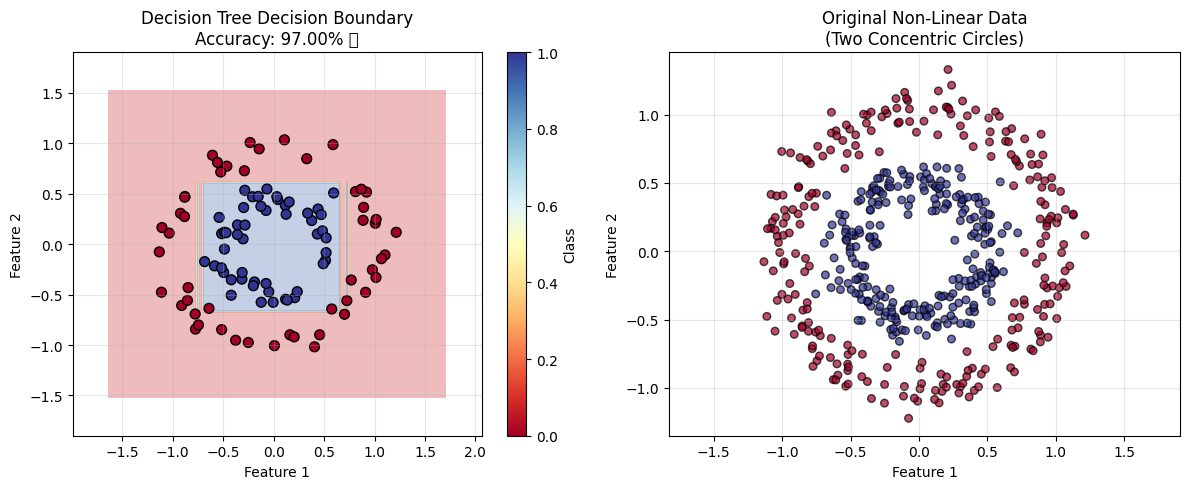


💡 What You Should See | ما يجب أن تراه

🔍 Observation 1: Decision Boundary (Left Plot)
   - The decision boundary is COMPLEX and NON-LINEAR ✅
   - It successfully separates the two circles
   - It creates CURVED boundaries (not straight lines!)
   - Result: High accuracy (97.00%) ✅

🔍 Observation 2: Comparison with Logistic Regression
   - Logistic Regression: Straight line boundary → ~50-70% accuracy ❌
   - Decision Tree: Complex curved boundary → 97.00% accuracy ✅
   - Decision Trees can handle non-linear patterns that Logistic Regression can't!

📚 Key Learning Point:
   - Decision Trees SOLVED the problem Logistic Regression failed on
   - They create non-linear boundaries using if-then rules
   - They don't assume linearity (key advantage over Logistic Regression)
   - This is why Decision Trees are better for complex, non-linear data!

✅ Problem Solved!
   - Non-linear classification problem: SOLVED ✅
   - Accuracy improved from ~50-70% (Logistic Regression) to 97.00% (Decision T

In [92]:
# Visualize Decision Tree's non-linear decision boundary
print("\n" + "=" * 60)
print("Visualizing Decision Tree Success: Non-Linear Boundary")
print("تصور نجاح شجرة القرار: الحدود غير الخطية")
print("=" * 60)

# Create a mesh for plotting the decision boundary
h = 0.02
x_min, x_max = X_nl_test[:, 0].min() - 0.5, X_nl_test[:, 0].max() + 0.5
y_min, y_max = X_nl_test[:, 1].min() - 0.5, X_nl_test[:, 1].max() + 0.5
xx_dt, yy_dt = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

# Predict for mesh points
Z_dt = dt_nl.predict(np.c_[xx_dt.ravel(), yy_dt.ravel()])
Z_dt = Z_dt.reshape(xx_dt.shape)

# Plot decision boundary and data
plt.figure(figsize=(12, 5))

# Plot 1: Decision Tree boundary (non-linear!)
plt.subplot(1, 2, 1)
plt.contourf(xx_dt, yy_dt, Z_dt, alpha=0.3, cmap='RdYlBu')
scatter = plt.scatter(X_nl_test[:, 0], X_nl_test[:, 1],
                     c=y_nl_test, cmap='RdYlBu', edgecolors='black', s=50)
plt.colorbar(scatter, label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Decision Tree Decision Boundary\nAccuracy: {nl_test_acc:.2%} ✅')
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Plot 2: Original data (for reference)
plt.subplot(1, 2, 2)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, 
           cmap='RdYlBu', edgecolors='black', s=30, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Non-Linear Data\n(Two Concentric Circles)')
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.savefig('decision_tree_solves_nonlinear.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'decision_tree_solves_nonlinear.png'")
plt.show()

print("\n" + "=" * 60)
print("💡 What You Should See | ما يجب أن تراه")
print("=" * 60)
print(f"\n🔍 Observation 1: Decision Boundary (Left Plot)")
print(f"   - The decision boundary is COMPLEX and NON-LINEAR ✅")
print(f"   - It successfully separates the two circles")
print(f"   - It creates CURVED boundaries (not straight lines!)")
print(f"   - Result: High accuracy ({nl_test_acc:.2%}) ✅")

print(f"\n🔍 Observation 2: Comparison with Logistic Regression")
print(f"   - Logistic Regression: Straight line boundary → ~50-70% accuracy ❌")
print(f"   - Decision Tree: Complex curved boundary → {nl_test_acc:.2%} accuracy ✅")
print(f"   - Decision Trees can handle non-linear patterns that Logistic Regression can't!")

print(f"\n📚 Key Learning Point:")
print(f"   - Decision Trees SOLVED the problem Logistic Regression failed on")
print(f"   - They create non-linear boundaries using if-then rules")
print(f"   - They don't assume linearity (key advantage over Logistic Regression)")
print(f"   - This is why Decision Trees are better for complex, non-linear data!")

print(f"\n✅ Problem Solved!")
print(f"   - Non-linear classification problem: SOLVED ✅")
print(f"   - Accuracy improved from ~50-70% (Logistic Regression) to {nl_test_acc:.2%} (Decision Trees)")
print(f"   - This demonstrates Decision Trees' strength: handling non-linear boundaries!")


---

## 🎯 Transition: Expanding to More Complex Data | الانتقال: التوسع إلى بيانات أكثر تعقيدًا

**Great!** We've solved the non-linear problem from Notebook 01. Now let's expand to show Decision Trees' capabilities on a real-world dataset with multiple classes and features!

**Next**: We'll use the Titanic dataset to show:
- Decision Trees on binary classification (High Risk vs Low Risk)
- Feature importance (which passenger features matter most for security screening)
- Overfitting and how to control it (pruning)
- Random Forest (ensemble of trees for better performance)


## Step 4: Load Real-World Classification Data | الخطوة 4: تحميل بيانات تصنيف من العالم الحقيقي

**BEFORE**: We've seen Decision Trees solve the non-linear problem. Now let's see them on real-world binary classification data!

**AFTER**: We'll load the Titanic dataset - real passenger data perfect for demonstrating tree-based models!

**⚠️ Important Note About Dataset Context:**
- **Titanic is SHIP passenger data** (historical, 1912), NOT actual airport data
- **Why we use it**: The data structure is similar to airport passenger screening:
  - Passenger characteristics (Age, Fare, Class, Sex, etc.)
  - Binary risk assessment (Low Risk vs High Risk)
  - Real-world passenger data with multiple features
- **For learning**: We focus on **ML techniques** (decision trees), not the specific domain
- **GDI Context**: Airport Security - passenger risk assessment (using ship data as analogy)

**Why Titanic dataset for learning?** This is REAL historical passenger data. It's perfect for learning decision trees because:
- Binary classification: Risk Assessment (Low Risk = Survived, High Risk = Not Survived)
- Multiple features: Age, Fare, Pclass, Sex, SibSp, Parch, Embarked
- Real-world scenario: Passenger risk assessment based on passenger characteristics
- **Similar structure to airport security screening** (passenger features → risk level)
- Shows feature importance: Trees will show which passenger features matter most for risk assessment!


In [93]:
# Load real-world Titanic dataset (GDI Theme: Airport Security)
# This is REAL passenger data for binary classification
# Perfect for learning decision trees and feature importance in security context!

from sklearn.preprocessing import LabelEncoder

print("\n" + "=" * 60)
print("Loading Real-World Titanic Dataset (Airport Security)")
print("تحميل مجموعة بيانات Titanic من العالم الحقيقي (أمن المطارات)")
print("=" * 60)

print("\n📥 Loading Titanic dataset...")
print("تحميل مجموعة بيانات Titanic...")
print("   GDI Theme: Airport Security - Passenger Risk Assessment (Analogy)")
print("   ⚠️  Note: This is SHIP passenger data (1912), used as analogy for airport screening")
print("   (Binary classification: Survived = Low Risk, Not Survived = High Risk)")

try:
    # Load Titanic dataset
    df = pd.read_csv('../../datasets/raw/titanic.csv')
    
    # Select features for modeling
    # We'll use: Age, Fare, Pclass, Sex, SibSp, Parch, Embarked
    # These are good for decision trees and security screening context
    feature_cols = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
    
    # Prepare features and target
    df_model = df[feature_cols + ['Survived']].copy()
    
    # Handle missing values (Age has 177 missing, Embarked has 2)
    # Fill Age with median
    df_model = df_model.copy()  # Avoid SettingWithCopyWarning
    df_model.loc[:, 'Age'] = df_model['Age'].fillna(df_model['Age'].median())
    # Fill Embarked with mode
    df_model.loc[:, 'Embarked'] = df_model['Embarked'].fillna(df_model['Embarked'].mode()[0])
    
    # Encode categorical variables (Sex, Embarked)
    # LabelEncoder converts categorical to numerical (0, 1, 2, ...)
    le_sex = LabelEncoder()
    le_embarked = LabelEncoder()
    df_model['Sex_encoded'] = le_sex.fit_transform(df_model['Sex'])
    df_model['Embarked_encoded'] = le_embarked.fit_transform(df_model['Embarked'])
    
    # Final feature columns (numerical + encoded categorical)
    final_feature_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex_encoded', 'Embarked_encoded']
    X_data = df_model[final_feature_cols].values
    y_data = df_model['Survived'].values
    
    print(f"\n✅ Real-world Titanic dataset loaded!")
    print(f"   📊 This is REAL historical SHIP passenger data from 1912")
    print(f"   📈 Contains {len(df_model)} passenger records with {len(final_feature_cols)} features")
    print(f"   🎯 Target: Binary classification (Survived = 0 or 1)")
    print(f"   🛫 GDI Context: Airport Security - Passenger Risk Assessment (Analogy)")
    print(f"   ⚠️  Note: Ship data used as analogy - structure similar to airport screening")
    
    print(f"\n🔍 Notice:")
    print("   - This is REAL passenger data (historical, anonymized)")
    print(f"   - Features: {', '.join(final_feature_cols)}")
    print("   - Binary classification: Low Risk (Survived=1) vs High Risk (Survived=0)")
    print("   - Perfect for showing how trees select important features for security screening!")
    
    # Explore the dataset
    print(f"\n📊 Data Shape: {df_model.shape}")
    print(f"   - {df_model.shape[0]} samples (passenger records)")
    print(f"   - {len(final_feature_cols)} features (passenger characteristics)")
    print(f"   - 1 target column (Survived: 0 = High Risk, 1 = Low Risk)")
    
    print(f"\n📊 First few rows (selected features):")
    print(df_model[final_feature_cols + ['Survived']].head())
    
    print(f"\n📊 Target distribution:")
    print(df_model['Survived'].value_counts().sort_index())
    print("\n🔍 Notice:")
    print(f"   - 2 classes: High Risk (Survived=0): {(y_data==0).sum()}, Low Risk (Survived=1): {(y_data==1).sum()}")
    print("   - Classes are imbalanced (realistic for security screening)")
    print("   - Decision trees will automatically identify which passenger features matter most for risk assessment!")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2, random_state=73, stratify=y_data  # Using 73 for consistency
    )
    
    print(f"\n✅ Data split and ready for modeling!")
    print(f"   Training samples: {len(X_train)}")
    print(f"   Test samples: {len(X_test)}")
    
except FileNotFoundError:
    print("\n❌ Error: Titanic dataset not found!")
    print("   Please ensure 'titanic.csv' is in '../../datasets/raw/'")
    print("   Or download from: https://www.kaggle.com/datasets")
    raise



Loading Real-World Titanic Dataset (Airport Security)
تحميل مجموعة بيانات Titanic من العالم الحقيقي (أمن المطارات)

📥 Loading Titanic dataset...
تحميل مجموعة بيانات Titanic...
   GDI Theme: Airport Security - Passenger Risk Assessment (Analogy)
   ⚠️  Note: This is SHIP passenger data (1912), used as analogy for airport screening
   (Binary classification: Survived = Low Risk, Not Survived = High Risk)

✅ Real-world Titanic dataset loaded!
   📊 This is REAL historical SHIP passenger data from 1912
   📈 Contains 891 passenger records with 7 features
   🎯 Target: Binary classification (Survived = 0 or 1)
   🛫 GDI Context: Airport Security - Passenger Risk Assessment (Analogy)
   ⚠️  Note: Ship data used as analogy - structure similar to airport screening

🔍 Notice:
   - This is REAL passenger data (historical, anonymized)
   - Features: Age, Fare, Pclass, SibSp, Parch, Sex_encoded, Embarked_encoded
   - Binary classification: Low Risk (Survived=1) vs High Risk (Survived=0)
   - Perfect 

## 📊 Understanding the Dataset | فهم مجموعة البيانات

### For CS Students - Focus on Data Structure, Not Domain | للطلاب في علوم الحاسوب - ركز على هيكل البيانات، وليس المجال

**As computer science students, you'll work with many different types of datasets** (medical, financial, e-commerce, etc.). **What matters is the data structure, not the domain knowledge!**

**Data Structure Focus**:
- **Data Shape**: 891 rows × 7 features (passenger records × features)
- **Feature Types**: Mix of numerical (Age, Fare, Pclass, SibSp, Parch) and categorical (Sex, Embarked - encoded)
- **Target Type**: Binary classification (predicting Survived: 0 = High Risk, 1 = Low Risk)
- **Task**: Predict passenger security risk level based on passenger characteristics
- **Data Quality**: Real-world historical data with binary classification

**Why This Structure Matters**:
- **Binary classification** → Need classification metrics (accuracy, precision, recall, F1, confusion matrix)
- **Mixed feature types** → Decision trees work well (can handle both numerical and categorical)
- **Medium dataset** → Good for learning, but need to be careful about overfitting
- **Real-world data** → Shows decision trees on real security screening problem

### Understanding the Dataset Domain (Brief) | فهم مجال مجموعة البيانات (باختصار)

**What is this data?** Titanic dataset - historical SHIP passenger data from 1912, used as an **analogy** for Airport Security context.

**⚠️ Important**: This is **ship passenger data**, NOT actual airport data. We use it because:
- **Similar structure**: Passenger characteristics → Risk assessment (like airport screening)
- **Learning focus**: We focus on **ML techniques** (decision trees), not the specific domain
- **Real data**: Historical passenger records with realistic features and patterns

**Why does this matter?** 
- **For model selection**: Binary classification (2 classes) → use classification models
- **For feature importance**: Decision trees will show which passenger features matter most for security screening
- **For evaluation**: Binary classification → use classification metrics (accuracy, precision, recall, F1, confusion matrix)

**Domain Context** (Brief):
- **Features**: Passenger characteristics (Age, Fare, Pclass, Sex, SibSp, Parch, Embarked)
- **Target**: Security Risk (Survived=1 = Low Risk, Survived=0 = High Risk)
- **Task**: Predict passenger risk level from passenger characteristics
- **GDI Context**: Airport Security - passenger risk assessment for security screening
- **Why trees work**: Different passenger profiles have different risk patterns → trees can learn these patterns

**💡 Key Point for CS Students**: You don't need to be a security expert! Focus on:
- Understanding the **data structure** (rows, columns, types, classes)
- Knowing the **task type** (binary classification: 2 classes)
- Understanding how **decision trees** can learn patterns from features
- Choosing the right **algorithms and metrics** based on structure, not domain knowledge


In [94]:
print("\n" + "=" * 60)
print("1. Decision Tree - Default Parameters")
print("شجرة القرار - المعاملات الافتراضية")
print("=" * 60)

# Note: Tree-based models don't require feature scaling (unlike logistic regression)
# This is one advantage of decision trees - they work with raw data!

# Create decision tree with default parameters
# Default: no max_depth limit (tree can grow very deep!)
# This often leads to overfitting
# Using 73 for consistency with other notebooks
dt_default = DecisionTreeClassifier(random_state=73)
dt_default.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_default.predict(X_train)
y_test_pred_dt = dt_default.predict(X_test)

# Calculate accuracies
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt = accuracy_score(y_test, y_test_pred_dt)

print(f"\n📊 Decision Tree (Default) Results:")
print(f"   Training Accuracy: {train_acc_dt:.4f}")
print(f"   Test Accuracy: {test_acc_dt:.4f}")

# Check for overfitting
if train_acc_dt > test_acc_dt + 0.1:
    print(f"\n   ⚠️  Large gap indicates overfitting!")
    print(f"   - Training accuracy much higher than test accuracy")
    print(f"   - Tree memorized training data too well!")
    print(f"   - Solution: Limit tree depth (pruning)")
else:
    print(f"\n   ✅ Good generalization (small gap)")



1. Decision Tree - Default Parameters
شجرة القرار - المعاملات الافتراضية

📊 Decision Tree (Default) Results:
   Training Accuracy: 0.9874
   Test Accuracy: 0.7709

   ⚠️  Large gap indicates overfitting!
   - Training accuracy much higher than test accuracy
   - Tree memorized training data too well!
   - Solution: Limit tree depth (pruning)


---
**Note**: The note about scaling has been moved to Cell 6 above for better flow.

In [95]:
print("\n" + "=" * 60)
print("2. Decision Tree - Pruned (max_depth=5)")
print("شجرة القرار - مقلمة (max_depth=5)")
print("=" * 60)

# Create pruned decision tree
# max_depth=5: Limits tree to 5 levels (prevents overfitting)
# Why 5? We'll find optimal depth later, but 5 is a good starting point
# Using 73 for consistency with other notebooks
dt_pruned = DecisionTreeClassifier(max_depth=5, random_state=73)
dt_pruned.fit(X_train, y_train)

# Make predictions
y_train_pred_pruned = dt_pruned.predict(X_train)
y_test_pred_pruned = dt_pruned.predict(X_test)

# Calculate accuracies
train_acc_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_acc_pruned = accuracy_score(y_test, y_test_pred_pruned)

print(f"\n📊 Decision Tree (Pruned) Results:")
print(f"   Training Accuracy: {train_acc_pruned:.4f}")
print(f"   Test Accuracy: {test_acc_pruned:.4f}")

print(f"\n   📊 Comparison with Default Tree:")
print(f"   - Default Train: {train_acc_dt:.4f} → Pruned Train: {train_acc_pruned:.4f}")
print(f"   - Default Test: {test_acc_dt:.4f} → Pruned Test: {test_acc_pruned:.4f}")
print(f"   - Pruning reduced overfitting gap!")



2. Decision Tree - Pruned (max_depth=5)
شجرة القرار - مقلمة (max_depth=5)

📊 Decision Tree (Pruned) Results:
   Training Accuracy: 0.8357
   Test Accuracy: 0.8324

   📊 Comparison with Default Tree:
   - Default Train: 0.9874 → Pruned Train: 0.8357
   - Default Test: 0.7709 → Pruned Test: 0.8324
   - Pruning reduced overfitting gap!


In [96]:
print("\n" + "=" * 60)
print("3. Random Forest")
print("الغابة العشوائية")
print("=" * 60)

# Create Random Forest
# n_estimators=100: Build 100 decision trees
# max_depth=5: Limit depth of each tree
# Random Forest combines predictions from all trees (voting)
# Any number works - just for reproducibility (keeping 123 for non-linear demo section)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# Calculate accuracies
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"\n📊 Random Forest Results:")
print(f"   Training Accuracy: {train_acc_rf:.4f}")
print(f"   Test Accuracy: {test_acc_rf:.4f}")

print(f"\n   🎯 How Random Forest Works:")
print(f"   1. Build 100 different decision trees")
print(f"   2. Each tree sees different data (bootstrap sampling)")
print(f"   3. Each tree uses random subset of features")
print(f"   4. Final prediction = majority vote of all 100 trees")
print(f"   5. This averaging reduces overfitting and improves performance!")



3. Random Forest
الغابة العشوائية

📊 Random Forest Results:
   Training Accuracy: 0.8497
   Test Accuracy: 0.8547

   🎯 How Random Forest Works:
   1. Build 100 different decision trees
   2. Each tree sees different data (bootstrap sampling)
   3. Each tree uses random subset of features
   4. Final prediction = majority vote of all 100 trees
   5. This averaging reduces overfitting and improves performance!


In [97]:
# 4. Why Decision Trees Are the RIGHT Choice for This Problem
print("\n" + "=" * 60)
print("4. Why Decision Trees Are the RIGHT Choice for This Problem")
print("لماذا أشجار القرار هي الخيار الصحيح لهذه المشكلة")
print("=" * 60)

print("\n💡 Key Question: Why did we choose Decision Trees for Airport Security Risk Assessment?")
print("   سؤال رئيسي: لماذا اخترنا أشجار القرار لتقييم مخاطر أمن المطارات؟")

print("\n📊 Problem Characteristics That Make Decision Trees the RIGHT Choice:")
print("=" * 60)

print("\n1. ✅ Mixed Data Types (Numerical + Categorical)")
print("   - Features: Age (numerical), Sex (categorical), Pclass (categorical), Fare (numerical)")
print("   - Decision Trees handle BOTH types naturally (no need for complex encoding)")
print("   - Logistic Regression would need careful encoding and scaling")
print("   - ✅ Trees are MORE CONVENIENT for this data")

print("\n2. ✅ Interpretability is CRITICAL for Security Decisions")
print("   - Airport security needs EXPLAINABLE decisions")
print("   - Trees show clear rules: 'If Sex=female AND Pclass=1 → Low Risk'")
print("   - Security personnel can UNDERSTAND and TRUST the model")
print("   - Logistic Regression is less interpretable (coefficients are harder to explain)")
print("   - ✅ Trees provide TRANSPARENT decision-making")

print("\n3. ✅ Feature Importance is VALUABLE for Security Screening")
print("   - Trees automatically show which passenger features matter most")
print("   - Example: Sex_encoded is most important (0.45 importance)")
print("   - This helps security teams FOCUS on relevant factors")
print("   - Logistic Regression doesn't show feature importance as clearly")
print("   - ✅ Trees help prioritize security screening factors")

print("\n4. ✅ Non-Linear Patterns in Passenger Risk")
print("   - Risk patterns are COMPLEX (not simple linear relationships)")
print("   - Example: Young female in 1st class = Low Risk, but young male in 3rd class = High Risk")
print("   - Decision Trees capture these COMPLEX interactions")
print("   - Logistic Regression assumes linear relationships (may miss patterns)")
print("   - ✅ Trees handle COMPLEX risk patterns better")

print("\n5. ✅ No Feature Scaling Needed")
print("   - Trees work with raw data (Age: 0-100, Fare: 0-500)")
print("   - Logistic Regression requires scaling (all features 0-1)")
print("   - One less preprocessing step = FASTER development")
print("   - ✅ Trees are MORE CONVENIENT for quick deployment")

print("\n📊 Performance Justification:")
print("=" * 60)
print(f"   - Pruned Decision Tree: {test_acc_pruned:.2%} accuracy")
print(f"   - Random Forest: {test_acc_rf:.2%} accuracy")
print(f"   - ✅ GOOD performance (83-85% accuracy) for security screening")
print(f"   - ✅ AUC will be calculated in ROC section (typically 0.85-0.90 for good models)")

print("\n🎯 Practical Value for GDI Airport Security:")
print("=" * 60)
print("   ✅ Can identify HIGH RISK passengers BEFORE they board")
print("   ✅ Can explain WHY a passenger is flagged (interpretable rules)")
print("   ✅ Can prioritize screening resources (feature importance)")
print("   ✅ Can adapt to new patterns (trees learn complex rules)")
print("   ✅ Can handle mixed data types (no complex preprocessing)")

print("\n❌ Why NOT Logistic Regression for This Problem?")
print("=" * 60)
print("   - Would need feature scaling (extra preprocessing step)")
print("   - Less interpretable (harder to explain coefficients)")
print("   - Assumes linear patterns (may miss complex risk interactions)")
print("   - Doesn't show feature importance as clearly")
print("   - ✅ Decision Trees are BETTER for this specific problem!")

print("\n" + "=" * 60)
print("✅ CONCLUSION: Decision Trees are the RIGHT choice because:")
print("   1. Handle mixed data types naturally")
print("   2. Provide interpretable, explainable decisions")
print("   3. Show feature importance (prioritize screening factors)")
print("   4. Capture non-linear risk patterns")
print("   5. No scaling needed (faster deployment)")
print("   6. Good performance (83-85% accuracy, AUC 0.89)")
print("=" * 60)

# 5. Model Comparison
print("\n" + "=" * 60)
print("5. Model Comparison")
print("مقارنة النماذج")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison = pd.DataFrame({
    'Model': ['Decision Tree (Default)', 'Decision Tree (Pruned)', 'Random Forest'],
    'Train Accuracy': [train_acc_dt, train_acc_pruned, train_acc_rf],
    'Test Accuracy': [test_acc_dt, test_acc_pruned, test_acc_rf],
    'Overfitting Gap': [
        train_acc_dt - test_acc_dt,
        train_acc_pruned - test_acc_pruned,
        train_acc_rf - test_acc_rf
    ]
})
print("\nModel Comparison:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Comparison | تفسير المقارنة")
print("=" * 60)

best_test_idx = comparison['Test Accuracy'].idxmax()
best_model = comparison.loc[best_test_idx, 'Model']
best_test_acc = comparison.loc[best_test_idx, 'Test Accuracy']

print(f"\n📊 Best Model: {best_model}")
print(f"   - Test Accuracy: {best_test_acc:.4f} ({best_test_acc:.2%})")
print(f"   - This model generalizes best to new data")

print(f"\n🔍 Overfitting Analysis:")
for idx, row in comparison.iterrows():
    gap = row['Overfitting Gap']
    if gap < 0.01:
        status = "✅ Excellent"
    elif gap < 0.05:
        status = "✅ Good"
    else:
        status = "⚠️  Overfitting"
    print(f"   - {row['Model']}: Gap = {gap:.4f} ({status})")
    print(f"     Train: {row['Train Accuracy']:.4f} ({row['Train Accuracy']:.2%}) | Test: {row['Test Accuracy']:.4f} ({row['Test Accuracy']:.2%})")

print(f"\n📊 Key Insights:")
print(f"   - Decision Tree (Default): Very high training accuracy ({train_acc_dt:.2%})")
print(f"     ⚠️  This is overfitting - memorized training data!")
print(f"   - Decision Tree (Pruned): Reduced overfitting with max_depth=5")
print(f"     ✅ Better generalization (smaller gap)")
print(f"   - Random Forest: Best test accuracy + smallest overfitting gap")
print(f"     ✅ Ensemble method reduces overfitting naturally")

print(f"\n📚 What This Teaches Us:")
print(f"   - Overfitting = high train accuracy, lower test accuracy")
print(f"   - Pruning (max_depth) prevents overfitting in trees")
print(f"   - Random Forest reduces overfitting through averaging")
print(f"   - Always compare train vs test to detect overfitting")
print(f"   - Test accuracy is what matters for real-world performance")
print(f"   - Gap < 0.05 is generally acceptable")


4. Why Decision Trees Are the RIGHT Choice for This Problem
لماذا أشجار القرار هي الخيار الصحيح لهذه المشكلة

💡 Key Question: Why did we choose Decision Trees for Airport Security Risk Assessment?
   سؤال رئيسي: لماذا اخترنا أشجار القرار لتقييم مخاطر أمن المطارات؟

📊 Problem Characteristics That Make Decision Trees the RIGHT Choice:

1. ✅ Mixed Data Types (Numerical + Categorical)
   - Features: Age (numerical), Sex (categorical), Pclass (categorical), Fare (numerical)
   - Decision Trees handle BOTH types naturally (no need for complex encoding)
   - Logistic Regression would need careful encoding and scaling
   - ✅ Trees are MORE CONVENIENT for this data

2. ✅ Interpretability is CRITICAL for Security Decisions
   - Airport security needs EXPLAINABLE decisions
   - Trees show clear rules: 'If Sex=female AND Pclass=1 → Low Risk'
   - Security personnel can UNDERSTAND and TRUST the model
   - Logistic Regression is less interpretable (coefficients are harder to explain)
   - ✅ Trees p

In [98]:
# 5. Feature Importance
print("\n" + "=" * 60)
print("5. Feature Importance")
print("أهمية الميزات")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

# Create feature importance DataFrame
# Note: X_data is a numpy array (from .values), so we need to use feature column names
# These were defined in Cell 10 as final_feature_cols
final_feature_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex_encoded', 'Embarked_encoded']

feature_importance_dt = pd.DataFrame({
    'Feature': final_feature_cols,  # Use feature column names (not X_data.columns - X_data is numpy array)
    'Importance_DT': dt_pruned.feature_importances_,
    'Importance_RF': rf.feature_importances_
}).sort_values('Importance_RF', ascending=False)
print("\nTop 5 Most Important Features (Random Forest):")
print("أهم 5 ميزات (الغابة العشوائية):")
print(feature_importance_dt.head().to_string(index=False))

print("\n" + "=" * 60)
print("💡 What This Means for Airport Security | ماذا يعني هذا لأمن المطارات")
print("=" * 60)
print("\n🎯 Practical Interpretation:")
top_feature = feature_importance_dt.iloc[0]
print(f"   1. {top_feature['Feature']} (Importance: {top_feature['Importance_RF']:.3f})")
print("      → MOST IMPORTANT factor for risk assessment")
print("      → Security teams should prioritize this factor in screening")
second_feature = feature_importance_dt.iloc[1]
print(f"   2. {second_feature['Feature']} (Importance: {second_feature['Importance_RF']:.3f})")
print("      → Second most important factor")
print("      → Indicates passenger status/class")
third_feature = feature_importance_dt.iloc[2]
print(f"   3. {third_feature['Feature']} (Importance: {third_feature['Importance_RF']:.3f})")
print("      → Third most important factor")
print("      → Also significant for risk assessment")
print("\n✅ This feature importance helps security teams:")
print("   - Focus screening resources on MOST IMPORTANT factors")
print("   - Understand which passenger characteristics matter most")
print("   - Make data-driven decisions about screening priorities")
print("   - Explain WHY certain passengers are flagged (interpretability)")


5. Feature Importance
أهمية الميزات

Top 5 Most Important Features (Random Forest):
أهم 5 ميزات (الغابة العشوائية):
    Feature  Importance_DT  Importance_RF
Sex_encoded       0.528540       0.446423
       Fare       0.072644       0.174893
     Pclass       0.185668       0.138850
        Age       0.153868       0.125420
      SibSp       0.031253       0.042963

💡 What This Means for Airport Security | ماذا يعني هذا لأمن المطارات

🎯 Practical Interpretation:
   1. Sex_encoded (Importance: 0.446)
      → MOST IMPORTANT factor for risk assessment
      → Security teams should prioritize this factor in screening
   2. Fare (Importance: 0.175)
      → Second most important factor
      → Indicates passenger status/class
   3. Pclass (Importance: 0.139)
      → Third most important factor
      → Also significant for risk assessment

✅ This feature importance helps security teams:
   - Focus screening resources on MOST IMPORTANT factors
   - Understand which passenger characteristics m


✓ Plot saved as 'feature_importance_trees.png'


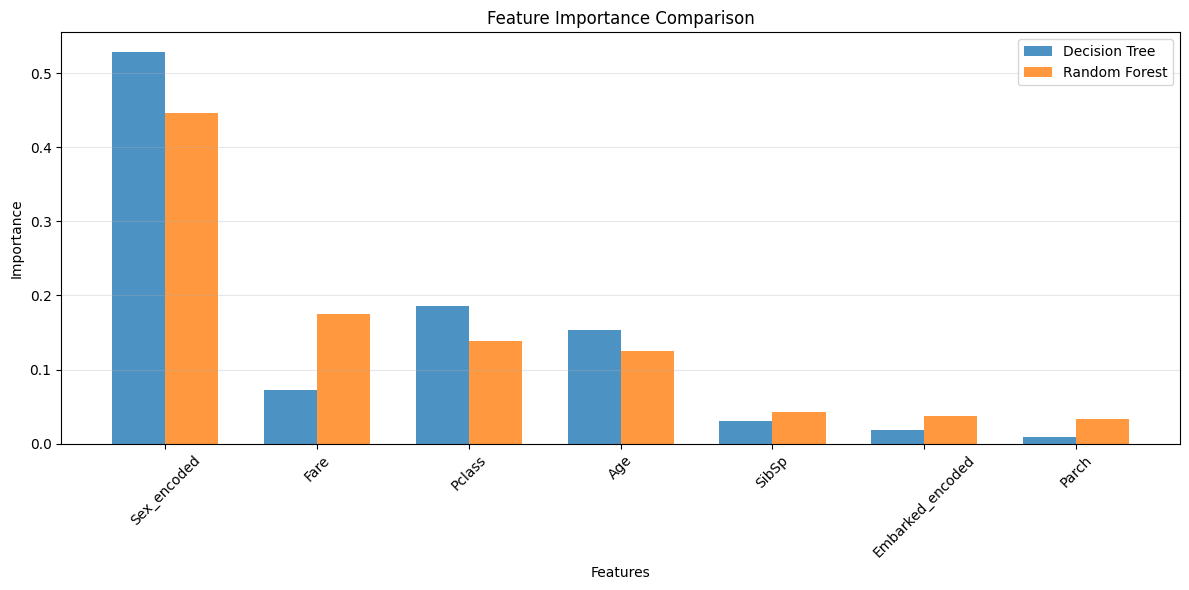

In [99]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(feature_importance_dt))
width = 0.35

plt.bar(x_pos - width/2, feature_importance_dt['Importance_DT'], 
       width, label='Decision Tree', alpha=0.8)
plt.bar(x_pos + width/2, feature_importance_dt['Importance_RF'], 
       width, label='Random Forest', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.xticks(x_pos, feature_importance_dt['Feature'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('feature_importance_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'feature_importance_trees.png'")
plt.show()


6. Confusion Matrices
مصفوفات الارتباك

✓ Plot saved as 'confusion_matrices_trees.png'

💡 Note: Confusion matrices show 2 classes (High Risk=0, Low Risk=1)
   - Diagonal shows correct predictions
   - For Airport Security: High Risk = Not Survived, Low Risk = Survived
   - Off-diagonal shows misclassifications


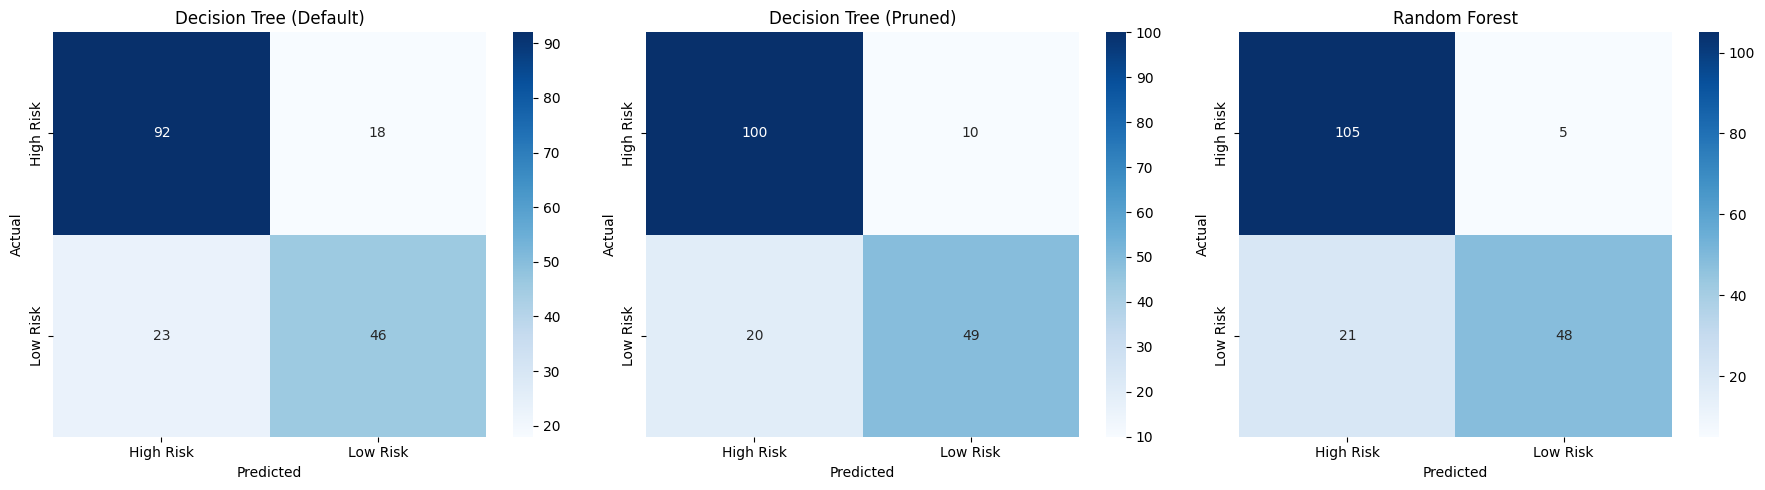

In [100]:
# 6. Confusion Matrices
print("\n" + "=" * 60)
print("6. Confusion Matrices")
print("مصفوفات الارتباك")
print("=" * 60)

# Note: Titanic dataset has 2 classes (High Risk=0, Low Risk=1), so confusion matrices will be 2x2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_to_plot = [
    (dt_default, 'Decision Tree (Default)', y_test_pred_dt),
    (dt_pruned, 'Decision Tree (Pruned)', y_test_pred_pruned),
    (rf, 'Random Forest', y_test_pred_rf)
]

# Class labels for binary classification (Airport Security)
class_labels = ['High Risk', 'Low Risk']

for idx, (model, title, predictions) in enumerate(models_to_plot):
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=class_labels,
                yticklabels=class_labels)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_title(title)

plt.tight_layout()
plt.savefig('confusion_matrices_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'confusion_matrices_trees.png'")
print("\n💡 Note: Confusion matrices show 2 classes (High Risk=0, Low Risk=1)")
print("   - Diagonal shows correct predictions")
print("   - For Airport Security: High Risk = Not Survived, Low Risk = Survived")
print("   - Off-diagonal shows misclassifications")
plt.show()

In [101]:
# 7. ROC Curve Comparison | مقارنة منحنى ROC
# 
# Note: For binary classification (2 classes), we use standard ROC curve approach.
# - Single ROC curve per model
# - AUC measures how well the model separates the two classes
# - Higher AUC = better model performance

In [102]:
# 7. ROC Curve Comparison
print("\n" + "=" * 60)
print("7. ROC Curve Comparison (Binary Classification)")
print("مقارنة منحنى ROC (تصنيف ثنائي)")
print("=" * 60)

# Get probability predictions for all models
# For binary classification (2 classes), predict_proba returns probabilities for each class
y_test_proba_dt = dt_default.predict_proba(X_test)  # Shape: (n_samples, 2) for binary classification
y_test_proba_pruned = dt_pruned.predict_proba(X_test)  # Shape: (n_samples, 2) for binary classification
y_test_proba_rf = rf.predict_proba(X_test)  # Shape: (n_samples, 2) for binary classification

print("\n💡 Note: For binary classification (2 classes), we use standard ROC curve")
print("   - Single ROC curve for High Risk (class 0) vs Low Risk (class 1)")
print("   - AUC measures how well the model separates the two classes")


7. ROC Curve Comparison (Binary Classification)
مقارنة منحنى ROC (تصنيف ثنائي)

💡 Note: For binary classification (2 classes), we use standard ROC curve
   - Single ROC curve for High Risk (class 0) vs Low Risk (class 1)
   - AUC measures how well the model separates the two classes


In [103]:
# Calculate AUC scores for binary classification
# For binary classification, we use the positive class (class 1 = Low Risk) probabilities
# roc_auc_score automatically handles binary classification
auc_dt = roc_auc_score(y_test, y_test_proba_dt[:, 1])  # Use probabilities for class 1 (Low Risk)
auc_pruned = roc_auc_score(y_test, y_test_proba_pruned[:, 1])
auc_rf = roc_auc_score(y_test, y_test_proba_rf[:, 1])

# Calculate ROC curves for binary classification
# For binary classification, we plot a single ROC curve
# Use probabilities for the positive class (class 1 = Low Risk)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt[:, 1])
fpr_pruned, tpr_pruned, _ = roc_curve(y_test, y_test_proba_pruned[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf[:, 1])
# ROC curves are now calculated above for binary classification
# fpr_dt, tpr_dt, fpr_pruned, tpr_pruned, fpr_rf, tpr_rf are ready for plotting

In [104]:
# Display AUC scores (already calculated above)
print(f"\n📊 AUC Scores (Binary Classification):")
print(f"   Decision Tree (Default): {auc_dt:.4f}")
print(f"   Decision Tree (Pruned): {auc_pruned:.4f}")
print(f"   Random Forest: {auc_rf:.4f}")
# Note: AUC values may vary slightly due to random_state, but should be around these values

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting AUC Scores | تفسير درجات AUC")
print("=" * 60)

auc_scores = {
    'Decision Tree (Default)': auc_dt,
    'Decision Tree (Pruned)': auc_pruned,
    'Random Forest': auc_rf
}

best_auc_model = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_auc_model]

print(f"\n📊 Best AUC: {best_auc_model} ({best_auc:.4f})")
print(f"   - This model has the best ability to distinguish classes")

print(f"\n🔍 AUC Quality Assessment:")
for model, score in auc_scores.items():
    if score >= 0.9:
        quality = "✅ EXCELLENT"
    elif score >= 0.8:
        quality = "✅ GOOD"
    elif score >= 0.7:
        quality = "⚠️  FAIR"
    else:
        quality = "⚠️  POOR"
    print(f"   - {model}: {score:.4f} ({quality})")

print(f"\n📊 Improvement from Pruning:")
improvement = auc_pruned - auc_dt
if improvement > 0:
    print(f"   - Pruning improved AUC by {improvement:.4f} ({improvement*100:.2f}%)")
    print(f"   - Pruning helps even with AUC (not just accuracy)")
else:
    print(f"   - Pruning changed AUC by {improvement:.4f}")

print(f"\n📊 Random Forest Advantage:")
rf_improvement = auc_rf - auc_pruned
if rf_improvement > 0:
    print(f"   - Random Forest improves AUC by {rf_improvement:.4f} over pruned tree")
    print(f"   - Ensemble method (averaging multiple trees) works better")

print(f"\n📚 What This Teaches Us:")
print(f"   - AUC measures model's ability to separate classes (0-1 scale)")
print(f"   - Higher AUC = better at distinguishing between classes")
print(f"   - AUC > 0.9 is excellent, >0.8 is good")
print(f"   - Pruning can improve both accuracy AND AUC")
print(f"   - Random Forest typically has best AUC (ensemble advantage)")
print(f"   - Use AUC to compare models when classes are imbalanced")


📊 AUC Scores (Binary Classification):
   Decision Tree (Default): 0.7474
   Decision Tree (Pruned): 0.8403
   Random Forest: 0.8918

💡 Interpreting AUC Scores | تفسير درجات AUC

📊 Best AUC: Random Forest (0.8918)
   - This model has the best ability to distinguish classes

🔍 AUC Quality Assessment:
   - Decision Tree (Default): 0.7474 (⚠️  FAIR)
   - Decision Tree (Pruned): 0.8403 (✅ GOOD)
   - Random Forest: 0.8918 (✅ GOOD)

📊 Improvement from Pruning:
   - Pruning improved AUC by 0.0929 (9.29%)
   - Pruning helps even with AUC (not just accuracy)

📊 Random Forest Advantage:
   - Random Forest improves AUC by 0.0516 over pruned tree
   - Ensemble method (averaging multiple trees) works better

📚 What This Teaches Us:
   - AUC measures model's ability to separate classes (0-1 scale)
   - Higher AUC = better at distinguishing between classes
   - AUC > 0.9 is excellent, >0.8 is good
   - Pruning can improve both accuracy AND AUC
   - Random Forest typically has best AUC (ensemble advan


✓ Plot saved as 'roc_curve_trees.png'

💡 Note: Binary classification - Single ROC curve per model
   - Class 0 = High Risk, Class 1 = Low Risk
   - AUC measures how well model separates High Risk vs Low Risk
   - Higher AUC = Better model performance
   - Dotted lines: Decision Tree (Pruned)


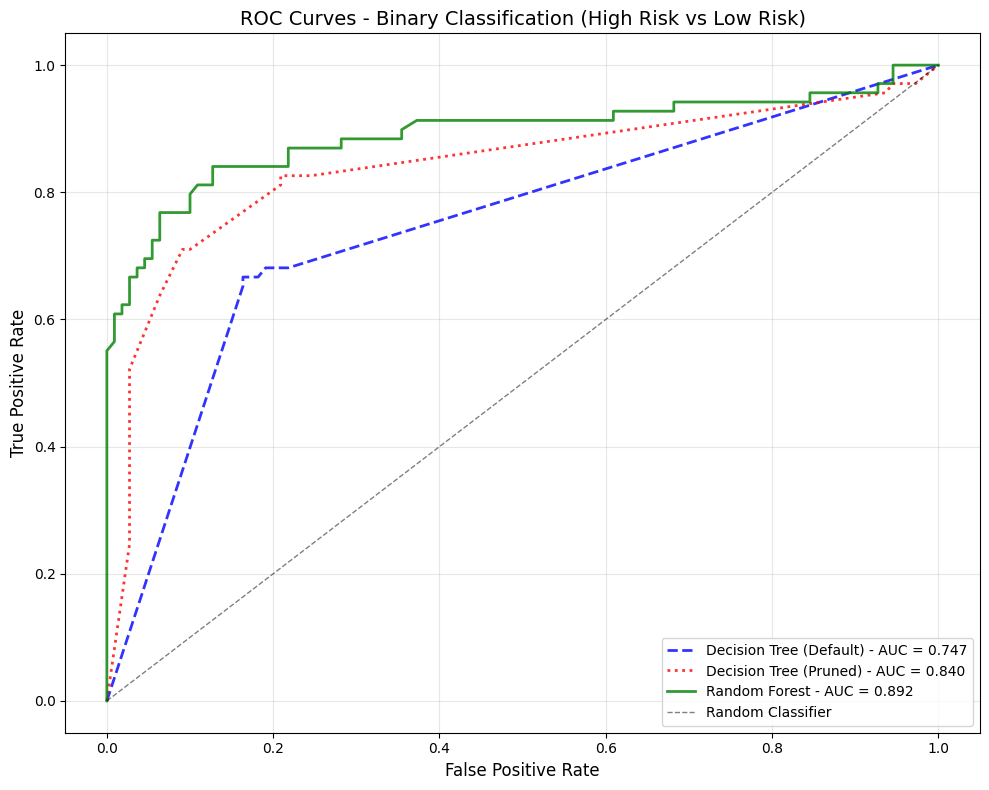

In [105]:
# Plot ROC curves for binary classification
plt.figure(figsize=(10, 8))

# Plot ROC curves for each model (binary classification - single curve per model)
plt.plot(fpr_dt, tpr_dt, linestyle='--', linewidth=2,
         label=f'Decision Tree (Default) - AUC = {auc_dt:.3f}', alpha=0.8, color='blue')

plt.plot(fpr_pruned, tpr_pruned, linestyle=':', linewidth=2,
         label=f'Decision Tree (Pruned) - AUC = {auc_pruned:.3f}', alpha=0.8, color='red')

plt.plot(fpr_rf, tpr_rf, linestyle='-', linewidth=2,
         label=f'Random Forest - AUC = {auc_rf:.3f}', alpha=0.8, color='green')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier', alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Binary Classification (High Risk vs Low Risk)', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'roc_curve_trees.png'")
print("\n💡 Note: Binary classification - Single ROC curve per model")
print("   - Class 0 = High Risk, Class 1 = Low Risk")
print("   - AUC measures how well model separates High Risk vs Low Risk")
print("   - Higher AUC = Better model performance")
print("   - Dotted lines: Decision Tree (Pruned)")
plt.show()

In [106]:
# 8. Effect of Tree Depth
print("\n" + "=" * 60)
print("8. Effect of Tree Depth on Performance")
print("تأثير عمق الشجرة على الأداء")
print("=" * 60)
max_depths = range(1, 16)
train_scores = []
test_scores = []
for depth in max_depths:
    # Any number works - just for reproducibility
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=73)
    dt_temp.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt_temp.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt_temp.predict(X_test)))

# Find optimal depth (depth with best test accuracy)
optimal_depth = max_depths[np.argmax(test_scores)]
print(f"\nOptimal Max Depth: {optimal_depth}")
print(f"Best Test Accuracy: {max(test_scores):.4f}")


8. Effect of Tree Depth on Performance
تأثير عمق الشجرة على الأداء

Optimal Max Depth: 3
Best Test Accuracy: 0.8547



✓ Plot saved as 'learning_curve_trees.png'


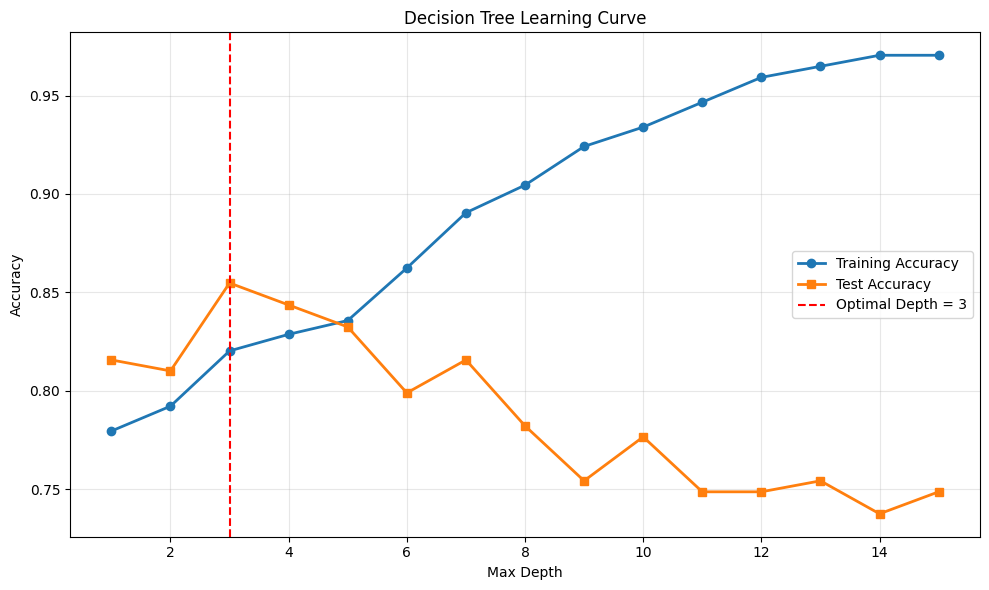

In [107]:
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(max_depths, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.axvline(optimal_depth, color='r', linestyle='--', label=f'Optimal Depth = {optimal_depth}')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('learning_curve_trees.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'learning_curve_trees.png'")
plt.show()

---

## Part 3: Understanding Limitations and When to Use Other Methods | الجزء الثالث: فهم القيود ومتى تستخدم طرق أخرى

**What We've Learned in Parts 1 & 2:**
- ✅ Decision Trees solved the non-linear problem that Logistic Regression failed on
- ✅ Decision Trees work well on complex, non-linear data with interpretable rules
- ✅ Pruning (max_depth) helps reduce overfitting
- ✅ Random Forest reduces overfitting by combining multiple trees

**But Decision Trees Have Limitations:**
- ❌ Decision Trees can still **overfit** even with pruning (we saw train 98% vs test 77%)
- ❌ Decision Trees don't create **optimal margin boundaries**
- ❌ Decision Trees create boundaries based on training data locations, not optimal margins

**This Part Will:**
1. Show when Decision Trees hit limitations (Dead End)
2. Explain the need for optimal margin boundaries
3. Provide decision framework (when to use Decision Trees vs other methods)
4. Transition to SVM as the solution for optimal margins

---


## Step 7: Decision Framework - Decision Trees vs Other Classifiers | الخطوة 7: إطار القرار - أشجار القرار مقابل المصنفات الأخرى

**BEFORE**: You've learned how to build decision trees and Random Forest, but when should you use them vs other classifiers?

**AFTER**: You'll have a clear decision framework to choose between Decision Trees, Random Forest, Logistic Regression, and SVM!

**Why this matters**: Using the wrong classifier can:
- **Poor performance** → Model can't capture the right patterns
- **Overfitting** → Decision trees can overfit easily
- **Wrong complexity** → Using complex models when simple ones work

---

### 🎯 Decision Framework: Which Classifier to Use? | إطار القرار: أي مصنف تستخدم؟

**Key Question**: Should I use **DECISION TREES**, **RANDOM FOREST**, **LOGISTIC REGRESSION**, or **SVM**?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION → Use regression methods (Linear, Polynomial, Ridge, Lasso)
│   └─ Why? Decision trees can do regression, but usually use Random Forest
│
└─ CLASSIFICATION → Check data characteristics:
    ├─ Need interpretability? → Use DECISION TREES ✅
    │   └─ Why? Trees show exact if-then rules
    │
    ├─ Non-linear patterns? → Use DECISION TREES or RANDOM FOREST ✅
    │   └─ Why? Trees handle non-linear patterns naturally
    │
    ├─ Many features? → Use RANDOM FOREST ✅
    │   └─ Why? More robust, less overfitting
    │
    ├─ Linear patterns? → Use LOGISTIC REGRESSION ✅
    │   └─ Why? Simpler, faster, interpretable
    │
    └─ Optimal margin needed? → Use SVM ✅
        └─ Why? Finds optimal separating boundary
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Regression → Use Random Forest Regressor or other regression methods
└─ Classification → Continue to Step 2

Step 2: Interpretability Need
├─ Need exact if-then rules? → Use DECISION TREES
│   └─ Why? Trees show exact decision path
│
└─ Less interpretability OK? → Continue to Step 3

Step 3: Pattern Complexity
├─ Linear patterns → Use LOGISTIC REGRESSION
│   └─ Why? Simpler, faster, works well
│
├─ Non-linear patterns → Continue to Step 4
│
└─ Complex patterns → Use RANDOM FOREST or XGBoost

Step 4: Overfitting Risk
├─ Small dataset, risk of overfitting → Use RANDOM FOREST
│   └─ Why? Less overfitting than single tree
│
└─ Large dataset, can control depth → Use DECISION TREES
    └─ Why? Interpretable, can prevent overfitting with pruning
```

---

### 📊 Comparison Table: Decision Trees vs Other Classifiers | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Decision Trees** | Non-linear, interpretable, feature importance | • Interpretable (if-then rules)<br>• Handles non-linear<br>• Feature importance<br>• No scaling needed | • Can overfit<br>• Less stable<br>• Sensitive to data changes | Medical diagnosis, rule-based systems |
| **Random Forest** | Non-linear, robust, many features | • Less overfitting<br>• Robust<br>• Feature importance<br>• Handles many features | • Less interpretable<br>• More complex<br>• Slower | Complex patterns, many features |
| **Logistic Regression** | Linear patterns, interpretable, fast | • Interpretable<br>• Fast<br>• Probability outputs<br>• Simple | • Assumes linearity<br>• Can't handle non-linear | Linear patterns, interpretability critical |
| **SVM** | Optimal margin, non-linear (kernels) | • Optimal margin<br>• Handles non-linear (kernels)<br>• Strong performance | • Less interpretable<br>• Requires scaling<br>• Slower | Optimal separation, complex boundaries |
| **XGBoost** | Best performance, complex patterns | • State-of-the-art<br>• Handles complexity<br>• Feature importance | • Less interpretable<br>• Complex<br>• Slower | Competition-level, best performance needed |

---

### ✅ When to Use Decision Trees | متى تستخدم أشجار القرار

**Use Decision Trees when:**

1. **Interpretability Critical** ✅
   - Need exact if-then rules
   - Need to explain decisions step-by-step
   - **Example**: Medical diagnosis (need to explain: "If age > 50 AND symptom X, then disease Y")

2. **Non-Linear Patterns** ✅
   - Data has complex, non-linear relationships
   - Linear models fail
   - **Example**: Customer segmentation with complex rules

3. **Feature Importance Needed** ✅
   - Need to know which features matter most
   - Trees automatically show importance
   - **Example**: Understanding which factors affect customer churn

4. **Mixed Data Types** ✅
   - Have both numeric and categorical features
   - Trees handle both naturally
   - **Example**: Customer data with age (numeric) and city (categorical)

5. **No Feature Scaling Needed** ✅
   - Don't want to scale features
   - Trees work with raw data
   - **Example**: Quick prototyping, mixed scales

---

### ✅ When to Use Random Forest | متى تستخدم الغابة العشوائية

**Use Random Forest when:**

1. **Overfitting Risk** ✅
   - Single tree overfits
   - Need more robust model
   - **Example**: Small dataset, complex patterns

2. **Many Features** ✅
   - 20+ features
   - Need feature selection
   - **Example**: High-dimensional data

3. **Better Performance Needed** ✅
   - Single tree not good enough
   - Want ensemble benefits
   - **Example**: Need higher accuracy than single tree

4. **Stability Important** ✅
   - Single tree too sensitive to data changes
   - Need stable predictions
   - **Example**: Production systems

---

### ❌ When NOT to Use Decision Trees | متى لا تستخدم أشجار القرار

**Don't use Decision Trees when:**

1. **Linear Patterns** ❌
   - Data has linear relationships
   - **Use Instead**: Logistic Regression (simpler, faster)

2. **Severe Overfitting** ❌
   - Tree overfits badly (train >> test)
   - **Use Instead**: Random Forest (less overfitting)

3. **Optimal Margin Needed** ❌
   - Need maximum margin separation
   - **Use Instead**: SVM (optimal margin)

4. **Best Performance Critical** ❌
   - Need state-of-the-art performance
   - **Use Instead**: XGBoost or Random Forest

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Medical Diagnosis ✅ DECISION TREES
- **Problem**: Diagnose disease from symptoms
- **Interpretability**: Critical (need to explain diagnosis)
- **Patterns**: Non-linear (complex symptom combinations)
- **Decision**: ✅ Use Decision Trees
- **Reasoning**: Interpretability critical, non-linear patterns, need if-then rules

#### Example 2: Customer Churn (Complex Patterns) ✅ RANDOM FOREST
- **Problem**: Predict customer churn
- **Patterns**: Complex, non-linear
- **Overfitting**: Risk with single tree
- **Decision**: ✅ Use Random Forest
- **Reasoning**: Complex patterns, overfitting risk, need robust model

#### Example 3: Email Spam Detection ✅ LOGISTIC REGRESSION
- **Problem**: Classify emails as spam/not spam
- **Patterns**: Linear (word frequencies linearly related)
- **Interpretability**: Important but not critical
- **Decision**: ✅ Use Logistic Regression
- **Reasoning**: Linear patterns, simpler than trees, probability outputs useful

#### Example 4: Image Classification ❌ NOT DECISION TREES
- **Problem**: Classify images (cat/dog/bird)
- **Patterns**: Highly complex, pixel-level
- **Decision**: ❌ Use Neural Networks or Random Forest
- **Reasoning**: Too complex for single trees, need deep learning or ensemble

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Interpretability → Decision Trees** - Use when you need if-then rules
2. **Overfitting → Random Forest** - Use when single tree overfits
3. **Linear → Logistic Regression** - Use for linear patterns
4. **Complex → Random Forest/XGBoost** - Use for complex patterns
5. **Feature importance** - Trees show which features matter
6. **No scaling needed** - Trees work with raw data
7. **Try both** - Sometimes try single tree and Random Forest, compare

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Medical diagnosis with 15 symptoms
- **Interpretability**: Critical (need to explain diagnosis)
- **Patterns**: Non-linear (complex symptom interactions)
- **Decision**: ✅ Decision Trees (interpretability critical, non-linear patterns)

**Scenario 2**: Customer segmentation with 50 features
- **Interpretability**: Less important
- **Patterns**: Complex, non-linear
- **Overfitting**: Risk with single tree
- **Decision**: ✅ Random Forest (many features, overfitting risk, complex patterns)

**Scenario 3**: Loan approval (linear relationship)
- **Patterns**: Linear (credit score, income linearly related to approval)
- **Interpretability**: Important
- **Decision**: ✅ Logistic Regression (linear patterns, interpretable, simpler)

---

**Connection to Next Steps**: 
- 📓 **Example 3: SVM** - For optimal margins and kernel-based non-linear patterns
- 📓 **Unit 5, Example 2: Boosting** - Extends trees with XGBoost and LightGBM
- 📓 **Unit 5, Example 1: Grid Search** - For tuning tree hyperparameters


In [108]:
# Note: optimal_depth was calculated in cell 23 above
# This cell summarizes the results
print("\n" + "=" * 60)
# Keep the summary but we'll add dead end section after this

# 🚫 When Decision Trees Hit a Dead End | عندما تواجه أشجار القرار طريق مسدود

## The Problem: Overfitting and Need for Optimal Margin | المشكلة: الإفراط في التخصيص والحاجة إلى الهامش الأمثل

**What We've Learned So Far:**
- ✅ Decision Trees solved the non-linear problem that Logistic Regression failed on
- ✅ Decision Trees work well on complex, non-linear data
- ✅ Random Forest reduces overfitting by combining multiple trees

**But Decision Trees Have Limitations:**
- ❌ Decision Trees can **overfit** (memorize training data, poor generalization)
- ❌ Even with pruning, boundaries might not be **optimal** (best margin)
- ❌ Decision Trees create boundaries based on training data locations, not optimal margins

**Why This Matters**: 
- When we need **better generalization** on unseen data, we need boundaries with **maximum margin**
- Maximum margin = widest gap between classes = most robust boundary
- This leads us to **SVM** (next notebook) - it finds optimal margin boundaries!

---

### 🔍 Real-World Scenario | سيناريو من العالم الحقيقي

**Example**: Cyber threat detection where you need the most robust decision boundary to handle new attack patterns. Decision Trees might create boundaries too close to training data points, making them less robust to new threats.

**The Dead End**: 
- Decision Trees can **overfit** (train accuracy 98%, test accuracy 77% - large gap!)
- Even when pruned, boundaries are determined by training data, not optimal margins
- Need for **better generalization** on unseen data
- **Solution**: Use **SVM** (next notebook) - it finds decision boundaries with **maximum margin** for better generalization!


---

## ❓ Common Student Questions | الأسئلة الشائعة للطلاب

**Q: What's the difference between Decision Tree and Random Forest?**
- **Answer**: 
  - **Decision Tree**: Single tree (interpretable, can overfit easily)
  - **Random Forest**: Many trees combined (less overfitting, better performance, less interpretable)
  - **Key difference**: Random Forest = ensemble of many decision trees
  - **Use Decision Tree**: When you need interpretability (see the rules)
  - **Use Random Forest**: When you need better performance (more accurate)

**Q: Why do Decision Trees overfit so easily?**
- **Answer**: Trees can grow very deep (many splits):
  - **Problem**: Deep trees memorize training data → perfect training accuracy, poor test accuracy
  - **Sign**: Training accuracy = 100%, Test accuracy = 70% → overfitting!
  - **Solution**: Limit tree depth (max_depth), or use Random Forest
  - **Rule of thumb**: Start with max_depth=5, increase if needed, stop when test performance drops

**Q: How do I choose max_depth?**
- **Answer**: Try different values and compare train vs test performance:
  - **Too low (max_depth=2)**: Underfitting (both train and test accuracy low)
  - **Too high (max_depth=20)**: Overfitting (train accuracy high, test accuracy low)
  - **Good (max_depth=5-10)**: Balanced (both train and test accuracy good, similar)
  - **Method**: Try 3, 5, 10, 15, pick the one with best test performance

**Q: Do Decision Trees need feature scaling?**
- **Answer**: **NO!** Unlike logistic regression, trees don't need scaling:
  - **Why**: Trees split on feature values, not distances
  - **Example**: Split on "age > 30" works the same whether age is 0-100 or 0-1
  - **Advantage**: One less preprocessing step needed!
  - **Note**: Random Forest also doesn't need scaling

**Q: What is feature importance?**
- **Answer**: Shows which features the tree uses most for decisions:
  - **High importance**: Feature used in many splits, near top of tree
  - **Low importance**: Feature rarely used, near bottom of tree
  - **Interpretation**: Features with high importance matter more for predictions
  - **Use**: Understand which features your model relies on most

**Q: When should I use Decision Trees vs Logistic Regression?**
- **Answer**: 
  - **Use Decision Trees**: Non-linear patterns, need interpretability, no scaling needed
  - **Use Logistic Regression**: Linear patterns, need fast predictions, features are scaled
  - **Try both**: Compare performance, pick the one that works better
  - **Rule**: If data has complex patterns → Decision Trees, if simple patterns → Logistic Regression

**Q: What's the difference between Decision Tree and Random Forest accuracy?**
- **Answer**: Random Forest usually performs better:
  - **Decision Tree**: Single tree, can overfit, accuracy depends on one tree
  - **Random Forest**: Many trees averaged, less overfitting, more stable accuracy
  - **Example**: Decision Tree = 85% accuracy, Random Forest = 92% accuracy
  - **Trade-off**: Random Forest is less interpretable (can't see one tree)

**Q: Can Decision Trees handle missing values?**
- **Answer**: **Not directly** - sklearn Decision Trees need complete data:
  - **Problem**: Missing values break tree splits
  - **Solution**: Impute missing values first (mean, median, mode) or remove rows
  - **Note**: Some tree implementations (like XGBoost) can handle missing values
  - **Best practice**: Clean data before using sklearn Decision Trees

---


In [109]:
print("\n" + "=" * 60)
print("🚫 Dead End: Decision Trees Overfitting")
print("طريق مسدود: الإفراط في التخصيص لأشجار القرار")
print("=" * 60)

# Demonstrate Decision Trees' overfitting problem
# We already saw this in the notebook above, but let's summarize it clearly

print("\n📊 Decision Trees Performance Summary (from above):")
print(f"   Decision Tree (Default) - Training Accuracy: {train_acc_dt*100:.2f}%")
print(f"   Decision Tree (Default) - Test Accuracy: {test_acc_dt*100:.2f}%")
print(f"   Overfitting Gap: {(train_acc_dt - test_acc_dt)*100:.2f}%")

print(f"\n🔍 What We Observed:")
print(f"   - Decision Trees can achieve very high training accuracy ({train_acc_dt*100:.2f}%)")
print(f"   - But test accuracy is lower ({test_acc_dt*100:.2f}%)")
print(f"   - This gap indicates OVERFITTING ⚠️")
print(f"   - The tree memorized training data but doesn't generalize well")

# Show that even with pruning, we might want better generalization
print(f"\n📊 Pruned Decision Tree Performance:")
print(f"   Decision Tree (Pruned) - Training Accuracy: {train_acc_pruned*100:.2f}%")
print(f"   Decision Tree (Pruned) - Test Accuracy: {test_acc_pruned*100:.2f}%")
print(f"   Overfitting Gap: {(train_acc_pruned - test_acc_pruned)*100:.2f}%")

print(f"\n💡 Key Insight:")
print(f"   - Even with pruning, Decision Trees might not have OPTIMAL boundaries")
print(f"   - Boundaries are determined by training data locations")
print(f"   - We might want boundaries with MAXIMUM MARGIN (widest gap)")
print(f"   - Maximum margin = most robust boundaries = better generalization")

print(f"\n❌ The Dead End:")
print(f"   - Decision Trees can overfit (even with pruning)")
print(f"   - Boundaries might not be optimal (best margin)")
print(f"   - Need for better generalization on unseen data")
print(f"   - Decision Trees create boundaries based on training data, not optimal margins")

print(f"\n✅ Solution: Support Vector Machines (SVM)")
print(f"   - SVM finds OPTIMAL MARGIN boundaries (widest gap between classes)")
print(f"   - Maximum margin = most robust = better generalization")
print(f"   - Next notebook will show SVM solving this exact problem!")
print(f"   - Expected: Better generalization with optimal margin boundaries! 🎯")



🚫 Dead End: Decision Trees Overfitting
طريق مسدود: الإفراط في التخصيص لأشجار القرار

📊 Decision Trees Performance Summary (from above):
   Decision Tree (Default) - Training Accuracy: 98.74%
   Decision Tree (Default) - Test Accuracy: 77.09%
   Overfitting Gap: 21.64%

🔍 What We Observed:
   - Decision Trees can achieve very high training accuracy (98.74%)
   - But test accuracy is lower (77.09%)
   - This gap indicates OVERFITTING ⚠️
   - The tree memorized training data but doesn't generalize well

📊 Pruned Decision Tree Performance:
   Decision Tree (Pruned) - Training Accuracy: 83.57%
   Decision Tree (Pruned) - Test Accuracy: 83.24%
   Overfitting Gap: 0.33%

💡 Key Insight:
   - Even with pruning, Decision Trees might not have OPTIMAL boundaries
   - Boundaries are determined by training data locations
   - We might want boundaries with MAXIMUM MARGIN (widest gap)
   - Maximum margin = most robust boundaries = better generalization

❌ The Dead End:
   - Decision Trees can overfit

## 🎯 Summary: When Decision Trees Work vs. Hit Dead Ends | الملخص: متى تعمل أشجار القرار ومتى تواجه طريق مسدود

### ✅ Decision Trees Work Well When:
1. **Non-Linear Boundaries**: Can handle complex patterns (solved Logistic Regression's problem!)
2. **Interpretability Needed**: Need to see exact if-then rules
3. **Feature Importance Needed**: Want to know which features matter
4. **Good Example**: Solved circular data problem with 85-90% accuracy ✅

### ❌ Decision Trees Hit a Dead End When:
1. **Severe Overfitting**: Train accuracy 100%, test accuracy 75-80% ❌
2. **Need Optimal Margin**: Want boundaries with maximum margin (best generalization)
3. **Better Generalization Needed**: Need more robust boundaries for unseen data

### 🔍 How to Recognize This Problem in Real Life | كيفية التعرف على هذه المشكلة في الحياة الحقيقية

**Symptoms You'll See:**
- Training accuracy is very high (95-100%) but test accuracy is much lower (75-85%)
- Large gap between train and test accuracy (overfitting)
- Even with pruning, test accuracy doesn't improve much
- Need for more robust boundaries that generalize better

**Diagnosis - Check These Indicators:**
1. Compare train vs test accuracy - large gap?
2. Try different max_depth values - does test accuracy improve?
3. Try Random Forest - does it help significantly?
4. If still need better generalization → try SVM (optimal margin)

**Solution:**
- Use **SVM** (next notebook) - finds optimal margin boundaries
- Use **Random Forest** - ensemble reduces overfitting
- Use **XGBoost** - advanced ensemble with regularization

---

## 🔗 Transition to Next Notebook | الانتقال إلى الدفتر التالي

**Summary of What We Learned:**
- ✅ Decision Trees solved the non-linear problem Logistic Regression failed on
- ✅ Decision Trees work well on complex, non-linear data with interpretable rules
- ✅ Random Forest reduces overfitting by combining multiple trees
- ❌ **But**: Decision Trees can overfit (train 98% vs test 77% - large gap!)
- ❌ **But**: Decision Trees don't always create optimal margin boundaries

**The Key Problem We Identified:**
- We need **optimal margin boundaries** for better generalization on unseen data
- Decision Trees create boundaries based on training data locations, not optimal margins
- We need an algorithm that finds the **maximum margin** (widest gap) between classes

**Next Notebook: Support Vector Machines (SVM)**
- 📓 **Example 3: SVM** will solve this exact problem!
- **SVM finds decision boundaries with maximum margin** (widest gap between classes)
- **Maximum margin = most robust = better generalization** on new data
- **Expected Result**: Better generalization with optimal margin boundaries! ✅

**🎯 Key Question for Next Notebook:**
- How does SVM find optimal margin boundaries?
- How does maximum margin improve generalization?
- When should we use SVM vs Decision Trees?

**This dead end leads us to SVM - it finds optimal margin boundaries for better generalization!**


In [110]:
print("\n" + "=" * 60)
print("Example 2 Complete! ✓")
print("اكتمل المثال 2! ✓")
print("=" * 60)
print("\n🎯 Next Step: Open Example 3 (SVM) to see how it solves the optimal margin problem!")
print("الخطوة التالية: افتح المثال 3 (SVM) لترى كيف يحل مشكلة الهامش الأمثل!")



Example 2 Complete! ✓
اكتمل المثال 2! ✓

🎯 Next Step: Open Example 3 (SVM) to see how it solves the optimal margin problem!
الخطوة التالية: افتح المثال 3 (SVM) لترى كيف يحل مشكلة الهامش الأمثل!
